# 📚 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import make_union
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

# 🏆 Le Wagon Kaggle Batch Challenge

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>

🏆 Welcome to your first Kaggle competition!

Your objective is to **submit an answer online** to the open competition - [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

- Fortunately, you have already come across the house dataset in the bootcamp!
- You will be semi-guided up to a **baseline model**
- Only after will you be free to improve & refine your models
- We will approach the problem through **pipelines** (the best practice to take!)

A word on Kaggle:
- Kaggle will rank your submission amongst all participants!
- But don't worry, everyone is publicly removed from the leaderboard after 2 months
- You can make up to 10 submissions per day

🧹 Today is the perfect day to practice keeping your long notebook **tidy** 🧹
- "Collapse all headings" from the "command palette" (`Cmd + Shift + P`)
- Stay idempotent (`Restart & Run All` should never crash)
- Name and delete variables carefully

# 💻 Setup Kaggle


👉 Create an account on Kaggle if you want to participate in the competition. 

👉 Join the [House Prices Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 

👉 Write down your Kaggle `username` in the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

**Your whole class will compete as a group against the team of TAs**

# 🐣 Baseline Model

## Load

In the challenge instructions, you should have already executed the steps to download everything you need from Kaggle into your current notebook folder:

- `train.csv` is your (1460 * 81) training set containing `X` and `y`
- `test.csv` is your (1459 * 80) testing set without the associated target `y` 😈
- `sample_submission.csv` describing the format required to submit your answer
- `data_description.txt` describing all columns

Your goal is to predict the `y_pred` missing from your test set and submit it to discover your test_score & ranking

❓ Load the training dataset in a DataFrame `data` and create your `X` and `y`. Inspect their shape

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data/train.csv")
data.set_index('Id', inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

## Initial feature overview

80 features is too much to deal with one-by-one for a first baseline pipeline! Let's treat them solely based on their `dtype`:

❓ How many numerical features vs. categorical features do we have? 

In [5]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

❓ Store the Series `feat_categorical_nunique` containing the number of **unique values** for each categorical feature in our training set. How many unique categories are there in total ?

In [6]:
feat_categorical_nunique = []

for category in X.select_dtypes(include='object').columns:
    feat_categorical_nunique.append(X[category].nunique())

In [7]:
category_df = pd.DataFrame(feat_categorical_nunique, X.select_dtypes(include='object').columns)
category_df.reset_index(inplace=True)
category_df.rename(columns={'index':'category',0:'number_of_unique_values'}, inplace=True)
category_df

,category,number_of_unique_values
0,MSZoning,5
1,Street,2
2,Alley,2
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9


🤔 If we were to `OneHotEncode` all categorical features, our feature matrix `X_preproc` would become pretty big and sparse, with almost 300 (highly correlated) features for only 1400 observations. Ideally, we should aim at feeding our model with ~50 features max (📚 Read this [rule of thumb](https://datascience.stackexchange.com/a/11480/98300))

We know 2 main strategies to reduce the number of categorical features post-preprocessing:
- **[Remove](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** features that bring too little explanation to our model. This may require statistical analysis of feature importance 
- **[Ordinally encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (instead of one-hot-encode) categorical features into integers. However this forces a notion of "order" (1>2>3...) that can be detrimental if not set properly!

❓ Plot the **histogram** of number of unique value per categorical feature. Do you see some quick wins?

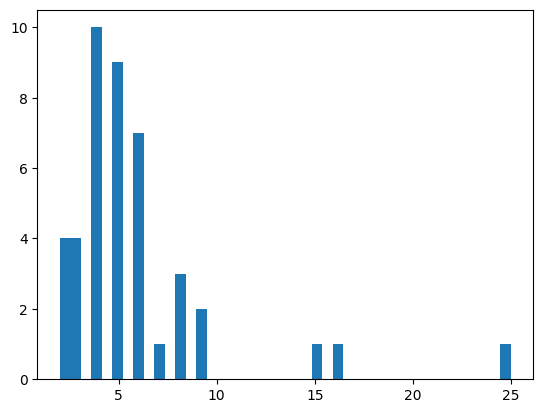

In [8]:
plt.hist(feat_categorical_nunique, bins=43)
plt.show()

💡 As a starter, what about simply **removing** all features that have **7 unique values or more**, and one-hot-encode every other? Let's keep ordinal encoding and statistical feature selection for the next iteration of our pipeline.

❓ Store features names to OHE in a list `feat_categorical_small` below. How many features will be OHE?

In [9]:
feat_categorical_small = list(category_df[category_df['number_of_unique_values'] < 7]['category'])
feat_categorical_small

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleCondition']

🧪 Test your code below (and clear the cell once it passed)

In [10]:
from nbresult import ChallengeResult
result = ChallengeResult('features_overview',
    n=len(feat_categorical_small))
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-houses-kaggle-competition/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_features_overview.py::TestFeaturesOverview::test_feat_categorical_small PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/features_overview.pickle

git commit -m 'Completed features_overview step'

git push origin master



## Baseline pipe

###  Preprocessing

❓ Let's code the basic preprocessing pipeline described below. Save it under `preproc_baseline`.

For categorical features
- Simple-Impute with most frequent values
- One-Hot-Encode features that have less than 7 unique values to start with
- Drop all others features


As for numerical features
- Simple-Impute with strategy 'mean'
- Min-Max Scale 


<details>
    <summary>ℹ️ Click here for a pro tip</summary>

If you are confident, you can try sklearn's shorter syntax `make_pipeline` or `make_column_transformer` instead of the longer syntax `Pipeline` or `ColumnTransformer` if you want to avoid giving names manually to every steps.
</details>

In [11]:
feat_numerical = X.select_dtypes(include=['float64','int64']).columns

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, feat_numerical),
    ('cat_tr', cat_transformer, feat_categorical_small)], 
    remainder = "drop")

In [12]:
# 2nd version

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
num_col = make_column_selector(dtype_include=['float64', 'int64'])

cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preproc_basic = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, feat_categorical_small),
    remainder='drop')

❓ Look at the **shape** of your preprocessed dataframe and save it to `shape_preproc_baseline` variable

In [13]:
X_transformed = preprocessor.fit_transform(X)

shape_preproc_baseline = X_transformed.shape
shape_preproc_baseline

(1460, 183)

In [14]:
# 2nd version

X_transformed_bis = preproc_basic.fit_transform(X)

shape_preproc_baseline_bis = X_transformed_bis.shape
shape_preproc_baseline_bis

(1460, 183)

🧪 Test your code below

In [15]:
from nbresult import ChallengeResult
result = ChallengeResult('preproc_baseline',
    shape=shape_preproc_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-houses-kaggle-competition/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_preproc_baseline.py::TestPreprocBaseline::test_shape PASSED         [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/preproc_baseline.pickle

git commit -m 'Completed preproc_baseline step'

git push origin master



### Add estimator

❓ Add a simple Decision Tree model to your `preproc_baseline` and store it to `pipe_baseline` variable.

In [16]:
pipe_baseline = make_pipeline(preprocessor, DecisionTreeRegressor())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF...
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'RoofStyle',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'FireplaceQu', 'GarageType',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive', ...])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

#### Cross-Validate

❓ Read the Kaggle [contest evaluation rules](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) 
- Which performance metric do you need? Is it readily available in sklearn?
- We will need to create our custom `sklearn.metrics.scorer` object so as to pass to any cross-validation or grid search as below


👉 Create a scorer called `rmsle` using [`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) that can be passed as a value for the `scoring` kwarg as below:
```python
cross_val_score(pipe_baseline, X, y, cv=5, scoring=rmsle)
```
👉 Create also the negative version `rmsle_neg` which is best when _maximized_. This will come handy later as `GridSearchCV` always tries to _maximize_ a score
```python
GridSearchCV(pipe_baseline, param_grid=..., cv=5, scoring=rmsle_neg)
```

$$\text{RMSLE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2.}$$

In [17]:
def func_rmsle(y_true,y_pred):
    return mean_squared_log_error(y_true, y_pred)**0.5
    
def func_rmsle_neg(y_true,y_pred):
    return -1*(mean_squared_log_error(y_true, y_pred)**0.5)    

rmsle = make_scorer(func_rmsle)
rmsle_neg = make_scorer(func_rmsle_neg)

❓5-fold cross-validate your `pipe_baseline` using this metric to get a first glance at your baseline performance.    

Store your mean score as `score_baseline`

In [18]:
score_baseline = cross_val_score(pipe_baseline, X, y, cv=5, scoring=rmsle).mean()
score_baseline

0.2111975696372621

## Predict baseline

❓ Predict `y_pred_baseline` from the Kaggle `test.csv` dataset you stored in the `data` folder.

In [19]:
data_test = pd.read_csv("data/test.csv")
data_test.set_index('Id', inplace=True)
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
pipe_baseline.fit(X,y)
y_pred_baseline = pipe_baseline.predict(data_test)
y_pred_baseline

array([127500., 157000., 193000., ..., 139000.,  93500., 200000.])

❓ Finally, store your CSV ready to be submitted as `submission_baseline.csv` in the `data` folder. **Carefully read** the Kaggle required format and test it below (you don't need to submit this baseline online for now).

In [21]:
submission_baseline = pd.DataFrame(y_pred_baseline, data_test.index)
submission_baseline.rename(columns={0:'SalePrice'}, inplace=True)
submission_baseline

,SalePrice
Id,
1461,127500.0
1462,157000.0
1463,193000.0
1464,174000.0
1465,220000.0
...,...
2915,84500.0
2916,83500.0
2917,139000.0


In [22]:
submission_baseline.to_csv('data/submission_baseline.csv')

🧪 Test your code

In [23]:
from nbresult import ChallengeResult
tmp = pd.read_csv("data/submission_baseline.csv")
result = ChallengeResult('submission_baseline',
    score_baseline = score_baseline,
    submission_shape = tmp.shape,
    submission_columns = list(tmp.columns),
    submission_dtypes = str(list(tmp.dtypes)),
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-houses-kaggle-competition/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 4 items

test_submission_baseline.py::TestSubmissionBaseline::test_score_baseline PASSED [ 25%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_columns PASSED [ 50%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_dtypes PASSED [ 75%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_shape PASSED [100%]

============================== 4 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/submission_baseline.pickle

git commit -m 'Completed submission_baseline step'

git push origin master



# 🏋️‍♀️ Preprocessing Iterations 

🎉 🎉 Congratulation for having fully pipelined a baseline model! You will see now how much easier it is to iterate and improve performance 🚀

- Your goal is to improve your prediction and submit it online **at least 30 minutes before the Recap ⏳**
- We have some suggestions for improvements below: **Pick your battles** and **incrementally** improve your pipeline as you see fit

**Estimators**

- **Tree-based ensembles (must try today)**: Probably the best suited for problems with many categorical features
- Stacking !
- XGBoost !

**Preprocessing** (once your first ensemble model works)

- Ordinal Encoding of categorical features with a hidden notion of order in their values (e.g. "bad", "average", good")
- Statistical Feature Selection to remove useless features (avoid overfitting and reduce train time)
- Predict `log(SalePrice)` instead?
- ...

## Ordinal Encoding (1h)

❓ Look at the following feature below. Couldn't it be encoded numerically in a wise manner?
```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

💡 Luckily, the `OrdinalEncoder` and its argument `categories`  allows us to do just that. Check it out below and make sure to understand how this works

In [37]:
# Define specific order for features
# Note: if you change this order, it will change the output for .transform()
feature_A_sorted_values = ['bad', 'average', 'good']
feature_B_sorted_values = ['dirty', 'clean', 'new']

encoder = OrdinalEncoder(
    categories=[
        feature_A_sorted_values,
        feature_B_sorted_values
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

# Just some random training data
XX = [
    ['good', 'dirty'],
    ['bad', 'new'],
    ['average', 'clean'],
]

encoder.fit(XX)

encoder.transform([
        ['bad', "dirty"],
        ["average", "clean"],
        ['good', 'new'],
        ['bad', 'oooops never seen this label before']
])

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 0., -1.]])

---
❓ **Your turn**: split your categorical preprocessor into

- `preproc_ordinal` to ordinally encode **some features** of your choice
- `preproc_nominal` to one-hot encode the other ones


<details>
    <summary>Hints</summary>

- You won't be able to avoid hard-coding names and ordered values of features! Be tidy!
- It's a good practice to sort alphabetically your features to avoid bad surprises
</details>

In [38]:
# Preprocessing with ordinally and one hot encoders

num_col = make_column_selector(dtype_include=['float64', 'int64'])
preproc_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
preproc_nominal = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                   'LotConfig', 'LandSlope','BldgType', 'RoofStyle', 'MasVnrType', 'Foundation',
                   'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical',
                   'GarageType', 'GarageFinish',
                   'GarageCond', 'PavedDrive', 'MiscFeature',
                   'SaleCondition']

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
  
feature_qual = ['Po', 'Fa', 'TA', 'Gd','Ex']
feature_exposure = ['No', 'Mn', 'Av', 'Gd']
feature_fintype2 = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
feature_fence = ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']

cat_ordinal_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value='Na'), OrdinalEncoder(
    categories=[
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_exposure, 
        feature_fintype2, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_fence
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1))

cat_nominal_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preproc_advanced_encoding = make_column_transformer(
    (num_transformer, num_col),
    (cat_ordinal_transformer, preproc_ordinal),
    (cat_nominal_transformer,preproc_nominal),
    remainder='drop')


In [39]:
pipe_advancedpreprocess_xgboost = make_pipeline(preproc_advanced_encoding, XGBRegressor())
cv_results_advancedprerocess_xgboost = cross_val_score(pipe_advancedpreprocess_xgboost, X, y, scoring=rmsle, cv=5)
score_advancedpreprocess_xgboost = cv_results_advancedprerocess_xgboost.mean()
score_advancedpreprocess_xgboost

0.1393293993826101

In [40]:
pipe_advancedpreprocess_xgboost.fit(X,y)
y_pred_advancedpreprocess_xgboost = pipe_advancedpreprocess_xgboost.predict(data_test)
submission_advancedpreprocess_xgboost = pd.DataFrame(y_pred_advancedpreprocess_xgboost, data_test.index)
submission_advancedpreprocess_xgboost.rename(columns={0:'SalePrice'}, inplace=True)
submission_advancedpreprocess_xgboost.to_csv('data/submission_advancedpreprocess_xgboost.csv')

In [41]:
pipe_advancedpreprocess_randomforest = make_pipeline(preproc_advanced_encoding, RandomForestRegressor())
pipe_advancedpreprocess_randomforest.fit(X,y)
y_pred_advancedpreprocess_randomforest = pipe_advancedpreprocess_randomforest.predict(data_test)
submission_advancedpreprocess_randomforest = pd.DataFrame(y_pred_advancedpreprocess_randomforest, data_test.index)
submission_advancedpreprocess_randomforest.rename(columns={0:'SalePrice'}, inplace=True)
submission_advancedpreprocess_randomforest.to_csv('data/submission_advancedpreprocess_randomforest.csv')

In [42]:
cross_val_score(pipe_advancedpreprocess_randomforest, X, y, scoring=rmsle, cv=5).mean()

0.146167018149126

## Statistical Feature Selection (~30min)

Our goal is to remove the least interesting features, to limit overfitting and shorten training time.  

🔥 We will make use of sklearn's [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) transformers directly in your pipeline!

❗️ We recommend you to **try only Option 1 today to start with**. Option 2 and 3 will be corrected in Recap

##### (Option 1 - recommended) <font color=green>Univariate</font> feature selection based on their mutual information with target `y`

- Feel free to add a `SelectPercentile` filter at the end of your `preproc` pipeline.
- This will filter-out features that, - taken individually - least explain your target!
- The statistical test we recommend to pass to SelectPercentile is the `mutual_info_regression`

<details>
    <summary markdown='span'>🤔 What is mutual information? Click here!</summary>

- Mutual information is a *statistical* distance between two probability distributions.
- Correlation is a *linear* distance between two random variables.
- Mutual information is more general and measures the reduction of uncertainty in Y after observing X.
- On the other hand, if you already know you are working with variables that are smooth (like continuous numerical variables), sometimes correlation may tell you more about them, for instance if their relationship is monotonic.

See [animation](https://twitter.com/ari_seff/status/1409296508634152964)
</details>

In [43]:
# Preprocessing with ordinally and one hot encoders

num_col = make_column_selector(dtype_include=['float64', 'int64'])
preproc_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
preproc_nominal = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                   'LotConfig', 'LandSlope','BldgType', 'RoofStyle', 'MasVnrType', 'Foundation',
                   'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical',
                   'GarageType', 'GarageFinish',
                   'GarageCond', 'PavedDrive', 'MiscFeature',
                   'SaleCondition']

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
  
feature_qual = ['Po', 'Fa', 'TA', 'Gd','Ex']
feature_exposure = ['No', 'Mn', 'Av', 'Gd']
feature_fintype2 = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
feature_fence = ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']

cat_ordinal_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), OrdinalEncoder(
    categories=[
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_exposure, 
        feature_fintype2, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_fence
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1))

cat_nominal_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preproc_advanced_encoding = make_column_transformer(
    (num_transformer, num_col),
    (cat_ordinal_transformer, preproc_ordinal),
    (cat_nominal_transformer,preproc_nominal),
    remainder='drop')

select_percentile = SelectPercentile(score_func=mutual_info_regression,percentile=70)

preproc_advanced_encoding_and_univariate_selection = make_pipeline(preproc_advanced_encoding, select_percentile)
preproc_advanced_encoding_and_univariate_selection




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142411450>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('ordina...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'RoofStyle',
                                                   'MasVnrType', 'Foundation',
                                                   'BsmtFinType1', 'Heating',
                                                   'CentralAir', 'Electrical',
                                                   'GarageType', 'GarageFinish',
                                                   'GarageCond', 'PavedDrive',
                                                   'MiscFeature',
                                                   'SaleCondition'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=70,
                                  score_func=<function mutual_info_regression at 0x1420e2ef0>))])

In [44]:
pipe_fullpreprocess_randomforest = make_pipeline(preproc_advanced_encoding_and_univariate_selection, RandomForestRegressor())
cv_results_advancedprerocess_univariate_rf = cross_val_score(pipe_fullpreprocess_randomforest, X, y, scoring=rmsle, cv=5)
score_advancedpreprocess_univariate_rf = cv_results_advancedprerocess_univariate_rf.mean()
score_advancedpreprocess_univariate_rf


0.14576491617181048

In [45]:
pipe_fullpreprocess_randomforest.fit(X,y)
y_pred_fullpreprocess_randomforest = pipe_fullpreprocess_randomforest.predict(data_test)
submission_fullpreprocess_randomforest = pd.DataFrame(y_pred_fullpreprocess_randomforest, data_test.index)
submission_fullpreprocess_randomforest.rename(columns={0:'SalePrice'}, inplace=True)
submission_fullpreprocess_randomforest.to_csv('data/submission_fullpreprocess_randomforest.csv')

In [46]:
pipe_fullpreprocess_xgboost = make_pipeline(preproc_advanced_encoding_and_univariate_selection, XGBRegressor())
pipe_fullpreprocess_xgboost.fit(X,y)
y_pred_fullpreprocess_xgboost = pipe_fullpreprocess_xgboost.predict(data_test)
submission_fullpreprocess_xgboost = pd.DataFrame(y_pred_fullpreprocess_xgboost, data_test.index)
submission_fullpreprocess_xgboost.rename(columns={0:'SalePrice'}, inplace=True)
submission_fullpreprocess_xgboost.to_csv('data/submission_fullpreprocess_xgboost.csv')

##### (option 2) <font color=green>Multivariate</font> feature selection based their combined relationship with target `y`

🤔 We want to remove features that, when in combination with all the others, do not really help predict our target.

1️⃣ To do so, remember that we can use feature [`permutation_importance`](https://scikit-learn.org/stable/modules/permutation_importance.html) metric in combination with an estimator! It trains one pipe per feature, so as to estimate which feature makes our performance score *decrease* the most when shuffling it randomly. These would be our most important features, which we don't want to remove. 

The best thing is, scikit-learn allows you to integrate this methodology directly into your `preproc` pipeline thanks to the [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) transformer: this will recursively remove least important features according to the `cross_val_score`.

However, this process can take extremely long to train when you have many features.

2️⃣ Alternatively, a faster way would be to make use of models that already output some measure of feature_importance when fitting them. For instance, Trees with gini-based `feature_importance_`, or Lasso regressions with L1 `coef_`. Again here, scikit-learn already has the [`SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) transformer to do just that.

In [47]:
# YOUR CODE HERE

##### (option 3) <font color=green>Unsupervised</font> selection: Filter based only on the properties of `X`? 

❓ A quick win is to remove features with the lowest variance. Think about it: a feature which only has one value is useless (and has a variance of 0).  
- Feel free to add a [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) to the end of your pipeline

In [48]:
# YOUR CODE HERE

❓ Additionally, we can check for correlation between our **numerical features** only

- Use [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) combined with a heatmap to check visually whether some **numerical** features almost entirely correlate with others. 
- Use `VIF` from statsmodels to check for features that have the highest multicollinearity

In [49]:
# YOUR CODE HERE

❓ For **ordinal features**, we can use [Spearman's rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) instead to check whether some **ordinally encoded** features are almost entirely "ordered" similarly to others. Feel free to plot a heatmap again

In [50]:
# YOUR CODE HERE

❓ Now, feel free to create a "filter" in your pipeline that removes any feature you want beyond a given (Spearman + Pearson) correlation threshold. You'll need a custom transformer class

In [51]:
# YOUR CODE HERE

## Target engineering (15 min)

❓ We are asked to minimize the RMS**L**E. Why don't we transform our target to directly predict its `log`?
- Check out the histogram of the target `y`.
- Normally distributed variables should be easier to predict with linear or parametric models. 
- Create `y_log` and your new performance metrics
- Don't forget to take the exponent of your predictions at the end!

In [52]:
y_log = np.log(y)

# ⭐️ My Model

In [24]:
print(f'Reminder: score of the baseline model is {score_baseline}')

Reminder: score of the baseline model is 0.2111975696372621


## Basic Random Forest Model

In [25]:
num_col = make_column_selector(dtype_include=['float64', 'int64'])
feat_categorical_small = list(category_df[category_df['number_of_unique_values'] < 7]['category'])

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())

cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preproc_basic = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, feat_categorical_small),
    remainder='drop')

In [26]:
pipe_basic_randomforest = make_pipeline(preproc_basic, RandomForestRegressor())

In [27]:
cv_results_basic_randomforest = cross_val_score(pipe_basic_randomforest, X, y, scoring=rmsle, cv=5)

In [28]:
score_basic_randomforest = cv_results_basic_randomforest.mean()
score_basic_randomforest

0.1482351218883305

In [29]:
pipe_basic_randomforest.fit(X,y)
y_pred_basic_randomf = pipe_basic_randomforest.predict(data_test)

In [30]:
submission_basic_randomf = pd.DataFrame(y_pred_basic_randomf, data_test.index)
submission_basic_randomf.rename(columns={0:'SalePrice'}, inplace=True)
submission_basic_randomf.to_csv('data/submission_basic_randomf.csv')

## Advanced Data Preprocessing

In [31]:
# Preprocessing with ordinally and one hot encoders

num_col = make_column_selector(dtype_include=['float64', 'int64'])
preproc_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
preproc_nominal = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                   'LotConfig', 'LandSlope','BldgType', 'RoofStyle', 'MasVnrType', 'Foundation',
                   'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical',
                   'GarageType', 'GarageFinish',
                   'GarageCond', 'PavedDrive', 'MiscFeature',
                   'SaleCondition']

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
  
feature_qual = ['Po', 'Fa', 'TA', 'Gd','Ex']
feature_exposure = ['No', 'Mn', 'Av', 'Gd']
feature_fintype2 = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
feature_fence = ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']

cat_ordinal_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), OrdinalEncoder(
    categories=[
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_exposure, 
        feature_fintype2, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_fence
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1))

cat_nominal_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preproc_advanced_encoding = make_column_transformer(
    (num_transformer, num_col),
    (cat_ordinal_transformer, preproc_ordinal),
    (cat_nominal_transformer,preproc_nominal),
    remainder='drop')

select_percentile = SelectPercentile(score_func=mutual_info_regression,percentile=70)

preprocessing_advanced = make_pipeline(preproc_advanced_encoding, select_percentile)
preprocessing_advanced


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1466a4ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('ordina...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'RoofStyle',
                                                   'MasVnrType', 'Foundation',
                                                   'BsmtFinType1', 'Heating',
                                                   'CentralAir', 'Electrical',
                                                   'GarageType', 'GarageFinish',
                                                   'GarageCond', 'PavedDrive',
                                                   'MiscFeature',
                                                   'SaleCondition'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=70,
                                  score_func=<function mutual_info_regression at 0x1420e2ef0>))])

## Choosing the best model

In [32]:
pipeline_log = make_pipeline(preprocessing_advanced, LogisticRegression(max_iter=10000))
pipeline_knn = make_pipeline(preprocessing_advanced, KNeighborsRegressor())
pipeline_randomforest = make_pipeline(preprocessing_advanced, RandomForestRegressor())
pipeline_xgboost = make_pipeline(preprocessing_advanced, XGBRegressor())
pipeline_gradientboosting = make_pipeline(preprocessing_advanced, GradientBoostingRegressor())

models = [pipeline_log, pipeline_knn, pipeline_randomforest, pipeline_xgboost, pipeline_gradientboosting]
cv_scores = []
                                        
for model in models:
    cv_scores.append(cross_val_score(model, X, y, scoring=rmsle, cv=5).mean())

cv_scores

/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.257699545394328,
 0.21408937519515417,
 0.14506525088538674,
 0.14056138936973533,
 0.1300627536713079]

> We will work with **Gradient Boosting Regressor**

## Target engineering

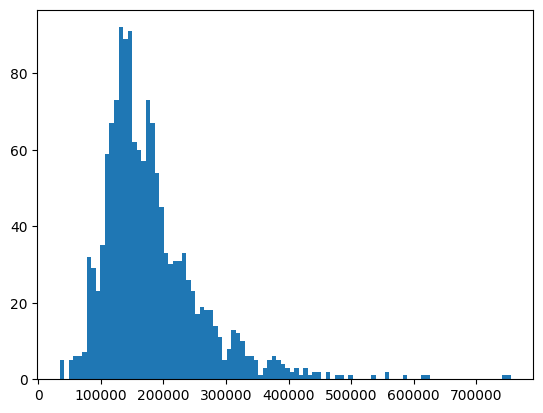

In [33]:
plt.hist(y, bins=100)
plt.show()

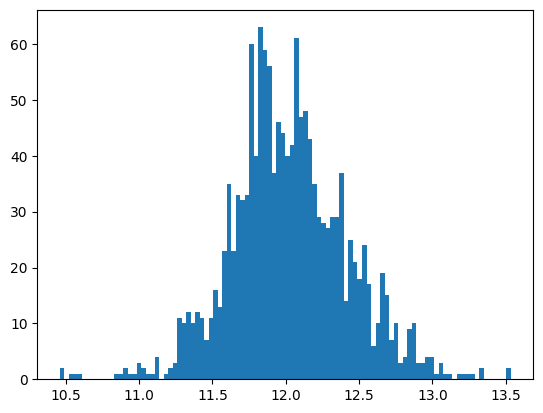

In [34]:
y_log = np.log(y)
plt.hist(y_log, bins=100)
plt.show()

In [35]:
score_gb_log = cross_val_score(pipeline_gradientboosting, X, y_log, scoring=rmsle, cv=5).mean()
score_gb_log

0.009859124158777991

## Predict with the optimized model

In [36]:
pipeline_gradientboosting.fit(X,y_log)
y_pred_gb_log = np.exp(pipeline_gradientboosting.predict(data_test))
submission_gb_log = pd.DataFrame(y_pred_gb_log, data_test.index)
submission_gb_log.rename(columns={0:'SalePrice'}, inplace=True)
submission_gb_log

,SalePrice
Id,
1461,120048.178320
1462,156953.831923
1463,180775.147975
1464,182605.494820
1465,199055.274379
...,...
2915,77104.570375
2916,81642.343046
2917,160157.108871


# 🏅Final Submission

Discover your real test score by submitting on Kaggle! 

👉 Write down your test score on the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

In [53]:
# Pipeline
num_col = make_column_selector(dtype_include=['float64', 'int64'])
preproc_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
preproc_nominal = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                   'LotConfig', 'LandSlope','BldgType', 'RoofStyle', 'MasVnrType', 'Foundation',
                   'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical',
                   'GarageType', 'GarageFinish',
                   'GarageCond', 'PavedDrive', 'MiscFeature',
                   'SaleCondition']

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
  
feature_qual = ['Po', 'Fa', 'TA', 'Gd','Ex']
feature_exposure = ['No', 'Mn', 'Av', 'Gd']
feature_fintype2 = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
feature_fence = ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']

cat_ordinal_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), OrdinalEncoder(
    categories=[
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_exposure, 
        feature_fintype2, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_qual, 
        feature_fence
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1))

cat_nominal_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preproc_advanced_encoding = make_column_transformer(
    (num_transformer, num_col),
    (cat_ordinal_transformer, preproc_ordinal),
    (cat_nominal_transformer,preproc_nominal),
    remainder='drop')

select_percentile = SelectPercentile(score_func=mutual_info_regression,percentile=70)

preprocessing_advanced = make_pipeline(preproc_advanced_encoding, select_percentile)

pipeline_gradientboosting = make_pipeline(preprocessing_advanced, GradientBoostingRegressor())

In [54]:
# Predict the new data
y_log = np.log(y)
pipeline_gradientboosting.fit(X,y_log)
y_pred_gb_log = np.exp(pipeline_gradientboosting.predict(data_test))
submission_gb_log = pd.DataFrame(y_pred_gb_log, data_test.index)
submission_gb_log.rename(columns={0:'SalePrice'}, inplace=True)
submission_gb_log.to_csv("data/submission_final.csv")